In [1]:
import csv
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)
from time import time
import logging
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
import seaborn as sns
import colorcet as cc

In [2]:
sns.set_style("darkgrid")
sns.set_context("paper")
colors = sns.color_palette(cc.glasbey_dark, n_colors = 12)

In [3]:
#loading the data from the OWID dataset and filtering only the data relevant to India and within our 
#observation period

In [4]:
all_data = pd.read_csv("owid-covid-data.csv")
india_data = all_data.where(all_data["location"] == "India").dropna(subset = ["location"])
data = india_data.where(("2020-01-22" <= india_data["date"]) & (india_data["date"] <= "2020-05-30")).dropna(subset = ["date"])

In [13]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-30,IND,Asia,India,2020-01-30,1.0,1.0,0.000,0.0,0.0,0.000,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
2020-01-31,IND,Asia,India,2020-01-31,1.0,0.0,0.000,0.0,0.0,0.000,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
2020-02-01,IND,Asia,India,2020-02-01,1.0,0.0,0.000,0.0,0.0,0.000,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
2020-02-02,IND,Asia,India,2020-02-02,2.0,1.0,0.000,0.0,0.0,0.000,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
2020-02-03,IND,Asia,India,2020-02-03,3.0,1.0,0.000,0.0,0.0,0.000,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
2020-02-04,IND,Asia,India,2020-02-04,3.0,0.0,0.429,0.0,0.0,0.000,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
2020-02-05,IND,Asia,India,2020-02-05,3.0,0.0,0.429,0.0,0.0,0.000,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
2020-02-06,IND,Asia,India,2020-02-06,3.0,0.0,0.286,0.0,0.0,0.000,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
2020-02-07,IND,Asia,India,2020-02-07,3.0,0.0,0.286,0.0,0.0,0.000,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0


In [5]:
#setting "datetime" as the index of the dataframe and substituting NaN values with 0

In [6]:
data["datetime"] = pd.to_datetime(data["date"])
data.set_index(keys = ["datetime"], inplace = True)
data.fillna(0, inplace = True)

In [6]:
#creating x-axis ticks for all the plots

In [7]:
start_date = pd.to_datetime("2020-01-22", format = "%Y-%m-%d")
week_starts = [start_date + pd.Timedelta(i, "W") for i in range(19)]
starts = [str(week.date()) for week in week_starts]

In [8]:
starts

['2020-01-22',
 '2020-01-29',
 '2020-02-05',
 '2020-02-12',
 '2020-02-19',
 '2020-02-26',
 '2020-03-04',
 '2020-03-11',
 '2020-03-18',
 '2020-03-25',
 '2020-04-01',
 '2020-04-08',
 '2020-04-15',
 '2020-04-22',
 '2020-04-29',
 '2020-05-06',
 '2020-05-13',
 '2020-05-20',
 '2020-05-27']

In [9]:
#creating list of incidents related to Tablighi Jamaat and Covid-19

In [10]:
events = {"2020-03-01" : "Tablighi Jamaat congregation begins", "2020-03-22" : "Janata Curfew", \
          "2020-03-25" : "National lockdown", "2020-03-31" : "Tablighi Jamaat declared super spreader event"}

In [14]:
#creating plot for daily cases of Covid-19 discovered during the observation period

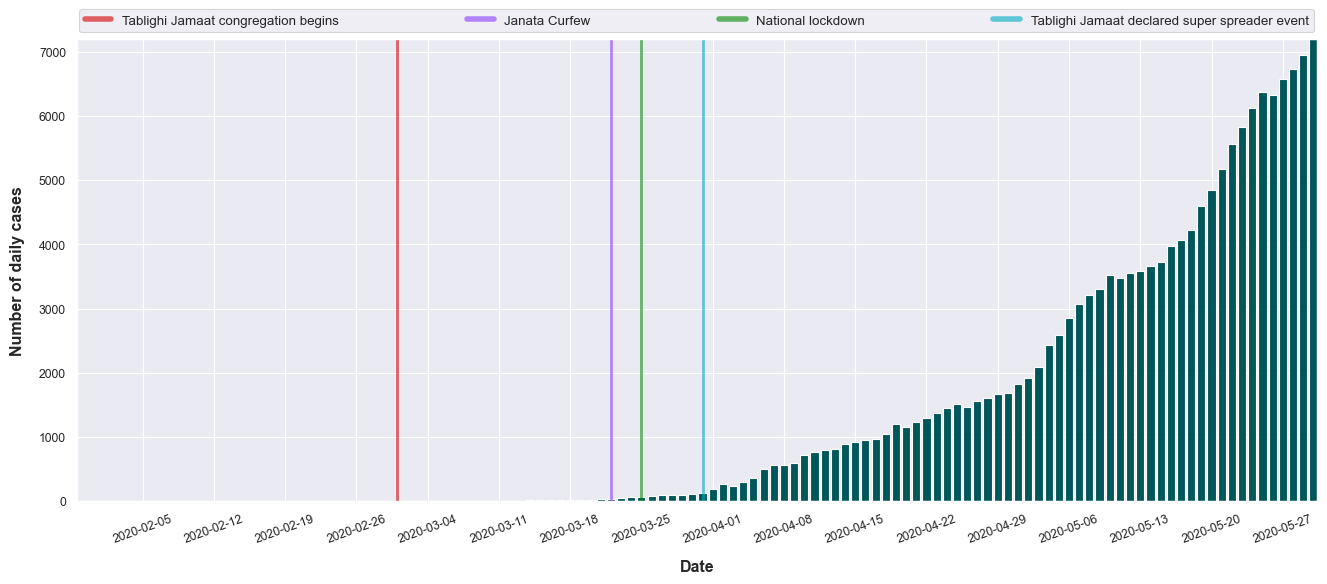

In [18]:
fig, ax = plt.subplots(figsize = (16, 6))
ax.bar(x = data.index, height = [val for val in data["new_cases_smoothed"]], linestyle = "-", color = colors[8])
ax.set_xticks(ticks = starts, labels = starts, rotation = 20)
ax.set_ylabel("Number of daily cases", labelpad = 10, fontsize = "large", fontweight = "bold")
ax.set_xlabel("Date", labelpad = 10, fontsize = "large", fontweight = "bold")
for i, tup in enumerate(events.items()):
    ax.axvline(x = pd.to_datetime(tup[0]), linestyle = "-", alpha = 0.6, label = tup[1], color = colors[i], \
               animated = True, linewidth = 2)
legend_lines = []
event_labels = []
for i, tup in enumerate(events.items()):
    legend_lines.append(Line2D([0], [0], color = colors[i], lw = 4, alpha = 0.6))
    event_labels.append(tup[1])
fig.legend(legend_lines, event_labels, loc = "lower left", bbox_to_anchor = (0.122, 0.88, 0.78, .02), mode = "expand", \
           ncol = 4, fontsize = "medium", frameon = True, fancybox = True)
ax.margins(x = 0)
ax.margins(y = 0)

In [19]:
fig.savefig("daily_cases_smoothed.png", bbox_inches = "tight")

In [21]:
#creating plot for daily tests of Covid-19 administered during the observation period

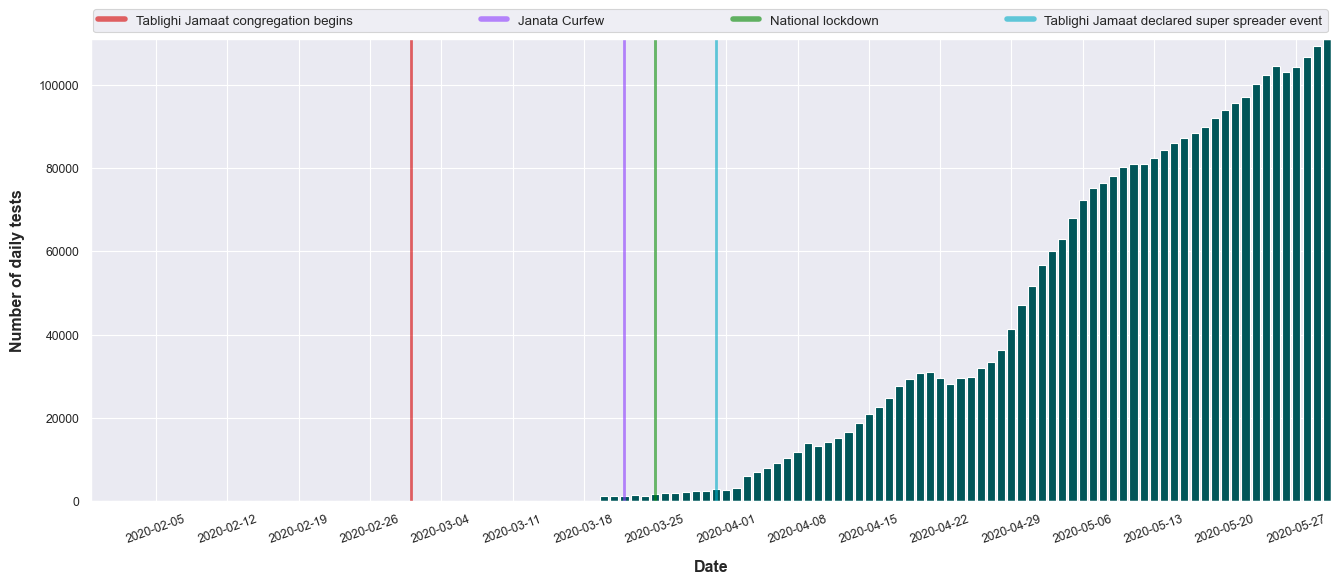

In [11]:
fig, ax = plt.subplots(figsize = (16, 6))
ax.bar(x = data.index, height = [val for val in data["new_tests_smoothed"]], linestyle = "-", color = colors[8])
ax.set_xticks(ticks = starts, labels = starts, rotation = 20)
ax.set_ylabel("Number of daily tests", labelpad = 10, fontsize = "large", fontweight = "bold")
ax.set_xlabel("Date", labelpad = 10, fontsize = "large", fontweight = "bold")
for i, tup in enumerate(events.items()):
    ax.axvline(x = pd.to_datetime(tup[0]), linestyle = "-", alpha = 0.6, label = tup[1], color = colors[i], \
               animated = True, linewidth = 2)
legend_lines = []
event_labels = []
for i, tup in enumerate(events.items()):
    legend_lines.append(Line2D([0], [0], color = colors[i], lw = 4, alpha = 0.6))
    event_labels.append(tup[1])
fig.legend(legend_lines, event_labels, loc = "lower left", bbox_to_anchor = (0.122, 0.88, 0.78, .02), mode = "expand", \
           ncol = 4, fontsize = "medium", frameon = True, fancybox = True)
ax.margins(x = 0)
ax.margins(y = 0)

In [12]:
fig.savefig("daily_tests_smoothed.png", bbox_inches = "tight")

In [25]:
#creating plot for the stringency index of Covid-19 related measures adopted by the Government of India

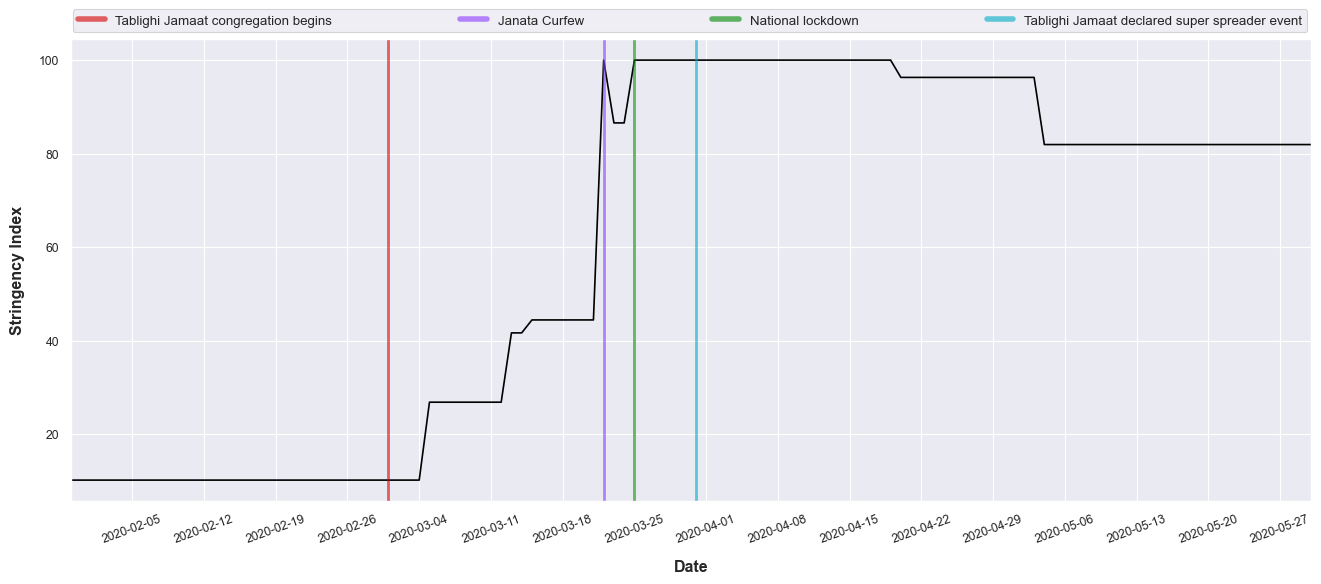

In [27]:
fig, ax = plt.subplots(figsize = (16, 6))
ax.plot(data["stringency_index"], linestyle = "-", color = "black")
ax.set_xticks(ticks = starts, labels = starts, rotation = 20)
ax.set_ylabel("Stringency Index", labelpad = 10, fontsize = "large", fontweight = "bold")
ax.set_xlabel("Date", labelpad = 10, fontsize = "large", fontweight = "bold")
for i, tup in enumerate(events.items()):
    ax.axvline(x = pd.to_datetime(tup[0]), linestyle = "-", alpha = 0.6, label = tup[1], color = colors[i], \
               animated = True, linewidth = 2)
legend_lines = []
event_labels = []
for i, tup in enumerate(events.items()):
    legend_lines.append(Line2D([0], [0], color = colors[i], lw = 4, alpha = 0.6))
    event_labels.append(tup[1])
fig.legend(legend_lines, event_labels, loc = "lower left", bbox_to_anchor = (0.122, 0.88, 0.78, .02), mode = "expand", \
           ncol = 4, fontsize = "medium", frameon = True, fancybox = True)
ax.margins(x = 0)

In [28]:
fig.savefig("stringency_index.png", bbox_inches = "tight")